<a href="https://colab.research.google.com/github/SantiRestrepoOlarte/Trabajo1_analitica2/blob/main/M1_Algoritmos_bases_introductorios_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación del notebook

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Regresión Lineal

**Caso de estudio**

La industria automovilística es extremadamente competitiva. Con el aumento de los precios del combustible y los consumidores exigentes, los fabricantes de automóviles optimizan constantemente sus procesos para aumentar la eficiencia del combustible. Pero, ¿qué pasaría si se pudiera disponer de un estimador fiable de las millas por galón (mpg) de un coche a partir de algunas especificaciones conocidas sobre el automóvil?

Dispone de un conjunto de datos de características de automóviles de diferentes modelos y marcas. A continuación se detallan las variables disponibles:

* mpg: millas por galón. Esta es la cantidad de combustible consumido por el vehículo particular de una instancia.
* cylinders: Este atributo describe el número de cilindros de cada automóvil
* displacement: Describe la cilindrada del motor
* Horsepower: Potencia de un automóvil
* Weight: Peso de cada automóvil
* Acceleration: Aceleración de automóvil
* Model Year: El año en que se lanzó el modelo de automóvil
* Origin: País de fabricación del automóvil
* Car Name: Nombre del automóvil

Documentación del modelo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html




In [3]:
# Lectura de los datos
#df_auto = pd.read_csv('data/auto-mpg.csv')
df_auto = pd.read_csv("https://raw.githubusercontent.com/mlondono-oc/LEA2/main/Modulo-2/data/auto-mpg.csv", na_values='?')

In [4]:
# 1: USA
# 2: Europe
# 3: Japan

df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
df_auto[df_auto['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


## Exploración de los datos

In [6]:
# Tamaño del dataset
df_auto.shape

(398, 9)

In [7]:
# Información general del dataset
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [10]:
# Exploración de los datos
df_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
# Preparación inicial de los datos
df_auto.drop(['car name'], axis=1, inplace=True)
df_auto=df_auto.rename(columns={'mpg':'target'})
df_auto=df_auto[df_auto['horsepower'].notna()]

In [17]:
df_auto.shape

(392, 8)

In [18]:
df_auto.head()

,target,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


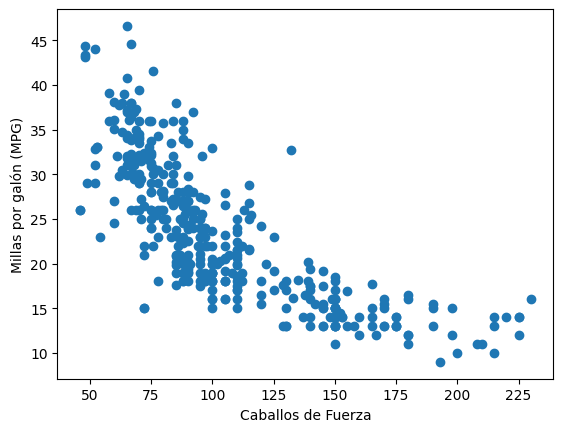

In [19]:
# Miremos la relación entre la variable objetivo y los caballos de fuerza
fig, ax  = plt.subplots(1, 1)
ax.scatter(df_auto.horsepower, df_auto.target)
ax.set_xlabel('Caballos de Fuerza')
ax.set_ylabel('Millas por galón (MPG)')
plt.show()


## Marco de validación

In [20]:
# Separemos la variable de entrada de la variable objetivo
df_rls=df_auto[['target','horsepower']]
y=df_rls['target']
#x=df_rls['horsepower']
x=df_rls.drop(['target'],axis=1)

In [21]:
# Separación de los datos de entrenamiento y validación
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(313, 1) (313,)
(79, 1) (79,)


## Regresión Lineal Simple

La regresión lineal simple tiene solo 1 variable predictora y 1 variable dependiente. A partir del conjunto de datos anterior, consideremos el efecto de los caballos de fuerza en el 'mpg' del vehículo.

In [22]:
# Se usa la función LinearRegresion() para
# estimar el modelo de regresión lineal.

# Crea el modelo
model_rls=LinearRegression()

# Calibra el modelo
model_rls.fit(x_train,y_train)

# Imprime los coeficientes
print(model_rls.coef_)

# Imprime el intercepto
print(model_rls.intercept_)

[-0.16259724]
40.606097600118346


In [23]:
# Pronostico para los datos de entrenamiento
y_pred_train=model_rls.predict(x_train)

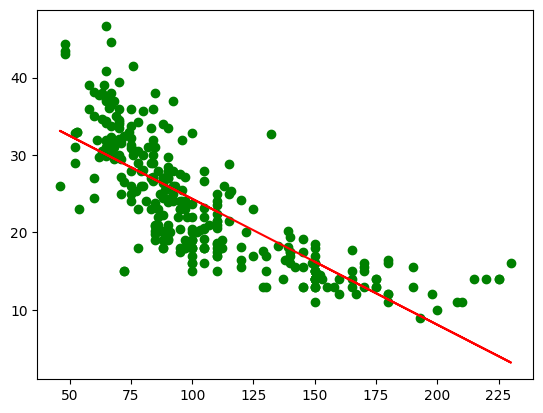

In [26]:
# Miremos como se ajusta el modelo a los datos
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,y_pred_train,color='red')
plt.show()

## Evaluación del modelo de regresión lineal

In [50]:
# Predicciones del modelo
y_pred_test=model_rls.predict(x_test)

In [51]:
# Métricas de evaluación
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error,r2_score,mean_absolute_error
import math

# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred_test))

# RMSE
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test,y_pred_test)))

#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred_test))

#MAPE
print("mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test,y_pred_test))

# R2
print("Variance score: %.2f" % r2_score(y_test,y_pred_test))

# R2-adjusted
r2=r2_score(y_test,y_pred_test)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

Mean squared error: 22.15
RMSE 4.71
Mean absolute error: 3.78
mean absolute percentage error: 0.18
Variance score: 0.57
R2-adjusted: 0.55


## Regresion Lineal Multiple

**Ejercicio**

Realice nuevamente el entrenamiento del modelo de regresión lineal utilizando las variables: horsepower, displacement, weight como características

In [52]:
# Excluimos los valores nulos de la columna horsepower
df_auto[df_auto['horsepower']=='?']

,target,cylinders,displacement,horsepower,weight,acceleration,model year,origin


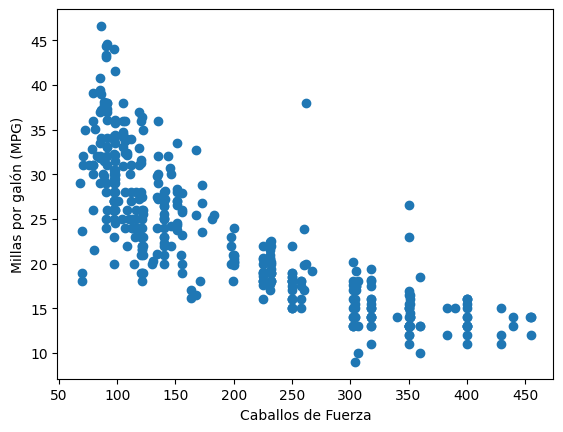

In [32]:
fig, ax  = plt.subplots(1, 1)
ax.scatter(df_auto.	displacement, df_auto.target)
ax.set_xlabel('Caballos de Fuerza')
ax.set_ylabel('Millas por galón (MPG)')
plt.show()

In [37]:
# Separemos las variables de entrada de la variable objetivo
df_rlm=df_auto[['target','horsepower','acceleration','displacement']]
y_rlm=df_rlm['target']
#x=df_rls['horsepower']
x_rlm=df_rlm.drop(['target'],axis=1)

In [34]:
df_rlm.head()

,target,horsepower,acceleration,displacement
0,18.0,130.0,12.0,307.0
1,15.0,165.0,11.5,350.0
2,18.0,150.0,11.0,318.0
3,16.0,150.0,12.0,304.0
4,17.0,140.0,10.5,302.0


In [53]:
# Separación de los datos de entrenamiento y validación

x_train_rlm,x_test_rlm,y_train_rlm,y_test_rlm=train_test_split(x_rlm,y_rlm,test_size=0.2,random_state=42)

print(x_train_rlm.shape,y_train_rlm.shape)
print(x_test_rlm.shape,y_test_rlm.shape)

(313, 3) (313,)
(79, 3) (79,)


In [54]:
# Se usa la función LinearRegresion() para
# estimar el modelo de regresión lineal.

# Crea el modelo
model_rlm=LinearRegression()

# Calibra el modelo
model_rlm.fit(x_train_rlm,y_train_rlm)

# Imprime los coeficientes
print(model_rlm.coef_)

# Imprime el intercepto
print(model_rlm.intercept_)


[-0.09366242 -0.44397326 -0.03774114]
47.6761274802159


In [55]:
# Predicciones
y_pred_test_rlm=model_rlm.predict(x_test_rlm)

In [59]:
# Métricas de evaluación
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,r2_score,mean_absolute_error
import math

# MSE
print("Mean squared error: %.2f" % mean_squared_error(y_test_rlm,y_pred_test_rlm))

# RMSE
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test_rlm,y_pred_test_rlm)))

#MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test_rlm,y_pred_test_rlm))

#MAPE
print("mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test_rlm,y_pred_test_rlm))

# R2
print("Variance score: %.2f" % r2_score(y_test_rlm,y_pred_test_rlm))

Mean squared error: 20.37
RMSE 4.51
Mean absolute error: 3.62
mean absolute percentage error: 0.17
Variance score: 0.60
